# *Découverte (Business Requirement) :*
**Problème Métier :**

> détecter la falsification du miel dans le domaine de la prévention de la fraude alimentaire.
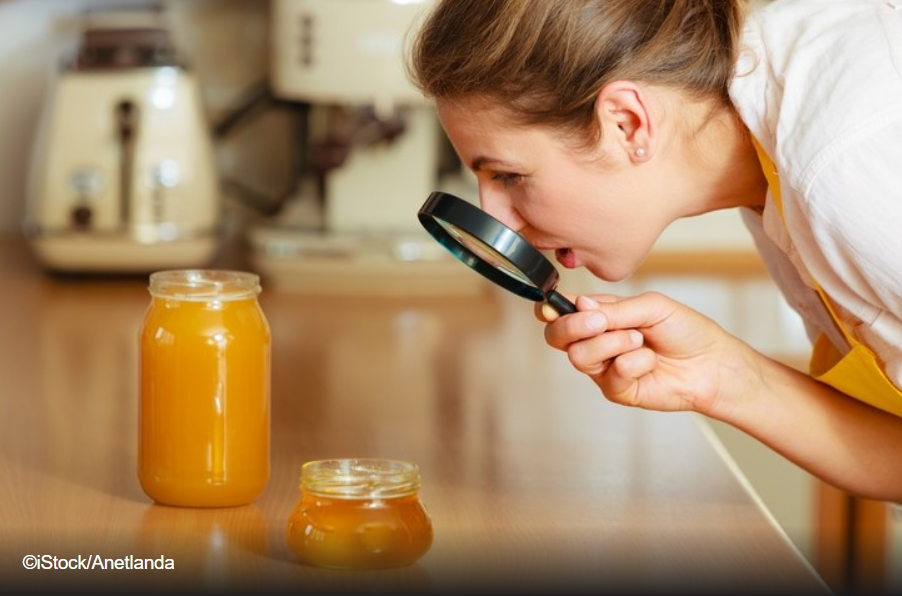
** Objectif **

> appliquer des techniques d'apprentissage supervisé et non supervisé à l'ensemble de données et de développer des modèles capables d'identifier le miel frauduleux en analysant diverses caractéristiques.corr.png

In [124]:
# Importation des Bibliothèques
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as m
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

# **Exploration des données**

*Chargement des données à partir d'un fichier csv :*

---



In [125]:
df=pd.read_csv("adulteration_dataset_26_08_2021.csv")

* *Affichage d'un résumé concis des informations sur le DataFrame*

---



In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Columns: 133 entries, Brand to Class
dtypes: float64(129), int64(2), object(2)
memory usage: 8.8+ MB


 * *texte en italique*Afficher les dimensions du dataframe:*

---



In [127]:
df.shape

(8675, 133)

 * Affichage de dix colonnes aléatoires :
**texte en gras**
---



In [128]:
df.sample(10)

,Brand,Acquisition,Concentration_Class,Concentration,399.40nm,404.39nm,409.38nm,414.37nm,419.37nm,424.38nm,...,1020.10nm,1025.55nm,1031.00nm,1036.46nm,1041.92nm,1047.38nm,1052.85nm,1058.32nm,1063.79nm,Class
4486,C7,5,10,10.0000,0.960596,0.944225,0.945831,0.933181,0.895143,0.841260,...,0.360367,0.367750,0.376410,0.394612,0.408046,0.429076,0.452210,0.477928,0.509739,Rewarewa
6703,C7,2,10,10.0000,0.952138,0.978855,0.935358,0.903927,0.904567,0.820620,...,0.367763,0.373484,0.380632,0.391859,0.406233,0.429479,0.448577,0.477942,0.509593,Rewarewa
790,C5,6,50,50.0000,1.052481,1.033894,1.021876,0.985826,0.929243,0.820201,...,0.430098,0.437161,0.445907,0.451800,0.467169,0.481405,0.496284,0.514660,0.537785,ManukaBlend
469,C1,5,25,24.9300,1.066376,1.050007,1.026868,0.985112,0.921392,0.774919,...,0.417805,0.424531,0.433112,0.446698,0.460023,0.482838,0.499230,0.512577,0.544261,Clover
6551,C7,6,10,10.0000,0.954997,0.948947,0.948920,0.933337,0.927418,0.854976,...,0.354579,0.357735,0.365008,0.381770,0.401373,0.423900,0.451038,0.471119,0.505328,BorageField
634,C10,2,50,50.0866,0.986276,0.951730,0.955975,0.939687,0.873725,0.795404,...,0.373564,0.377475,0.383420,0.396387,0.410814,0.432875,0.450757,0.475149,0.506037,ManukaUMF5
2965,C10,1,10,10.3444,0.965131,1.013046,0.951564,0.944750,0.890041,0.799890,...,0.363428,0.368922,0.372974,0.386724,0.399104,0.417763,0.438205,0.462597,0.488170,ManukaUMF20
4541,C7,2,10,10.0000,0.957695,0.987749,0.962303,0.959740,0.915284,0.852468,...,0.357811,0.361566,0.373511,0.382582,0.402319,0.421021,0.442711,0.465931,0.502311,BorageField
2628,C7,5,10,9.9800,1.018957,0.994377,0.981007,0.932658,0.896143,0.859568,...,0.446947,0.452787,0.462197,0.473701,0.485994,0.503902,0.525834,0.548389,0.575466,Kamahi
7254,C7,1,5,5.0000,1.037040,1.010390,1.003273,0.997837,0.935786,0.882256,...,0.463564,0.459173,0.463889,0.474154,0.484461,0.503032,0.519112,0.532828,0.563764,Kamahi


**=>** Le jeu de données contient un total de  8675  instances

In [129]:
#Les noms des attributs
print(df.columns.to_list())
#Les types des attributs
print(df.dtypes)

['Brand', 'Acquisition', 'Concentration_Class', 'Concentration', '399.40nm', '404.39nm', '409.38nm', '414.37nm', '419.37nm', '424.38nm', '429.38nm', '434.40nm', '439.41nm', '444.43nm', '449.45nm', '454.48nm', '459.51nm', '464.54nm', '469.58nm', '474.62nm', '479.67nm', '484.72nm', '489.77nm', '494.83nm', '499.89nm', '504.95nm', '510.02nm', '515.10nm', '520.17nm', '525.25nm', '530.34nm', '535.43nm', '540.52nm', '545.61nm', '550.71nm', '555.82nm', '560.93nm', '566.04nm', '571.15nm', '576.27nm', '581.40nm', '586.52nm', '591.65nm', '596.79nm', '601.93nm', '607.07nm', '612.22nm', '617.37nm', '622.52nm', '627.68nm', '632.84nm', '638.00nm', '643.17nm', '648.35nm', '653.53nm', '658.71nm', '663.89nm', '669.08nm', '674.27nm', '679.47nm', '684.67nm', '689.87nm', '695.08nm', '700.29nm', '705.51nm', '710.73nm', '715.95nm', '721.18nm', '726.41nm', '731.65nm', '736.89nm', '742.13nm', '747.38nm', '752.63nm', '757.88nm', '763.14nm', '768.40nm', '773.67nm', '778.94nm', '784.21nm', '789.49nm', '794.77nm',

*Afficher le résumé statistique de ce jeu de données pour l'ensemble des variables*

---



In [ ]:
df.describe() #sur les attributs qunatitatifs

,Acquisition,Concentration_Class,Concentration,399.40nm,404.39nm,409.38nm,414.37nm,419.37nm,424.38nm,429.38nm,...,1014.66nm,1020.10nm,1025.55nm,1031.00nm,1036.46nm,1041.92nm,1047.38nm,1052.85nm,1058.32nm,1063.79nm
count,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,...,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000,8675.000000
mean,3.492795,21.210375,21.409408,1.010990,1.000701,0.985824,0.967903,0.924619,0.839474,0.705838,...,0.395885,0.395783,0.399881,0.407497,0.419155,0.434333,0.452617,0.471370,0.491992,0.518427
std,1.705093,20.829969,20.817630,0.035927,0.035852,0.034740,0.032214,0.034189,0.042209,0.053436,...,0.037140,0.037647,0.038207,0.038667,0.039125,0.039465,0.039790,0.040014,0.040090,0.040282
min,1.000000,0.000000,0.000000,0.920153,0.897098,0.883949,0.879236,0.834011,0.735861,0.570913,...,0.336157,0.335316,0.336635,0.340854,0.350229,0.359668,0.377267,0.386495,0.405731,0.431541
25%,2.000000,5.000000,5.100000,0.984468,0.973940,0.959895,0.944302,0.901376,0.808138,0.665415,...,0.365473,0.365229,0.369302,0.376571,0.387980,0.403313,0.422358,0.442105,0.463944,0.491342
50%,3.000000,10.000000,10.200000,1.005687,0.995931,0.981429,0.964417,0.921528,0.835100,0.699941,...,0.389018,0.387813,0.391050,0.397971,0.409096,0.424212,0.442930,0.462629,0.484104,0.511836
75%,5.000000,25.000000,25.280000,1.035234,1.024786,1.008960,0.987066,0.944934,0.865902,0.739983,...,0.422947,0.422749,0.426646,0.434484,0.445368,0.459482,0.476847,0.494515,0.513860,0.538322
max,6.000000,100.000000,100.000000,1.160034,1.145434,1.126460,1.091392,1.071707,1.029565,0.952382,...,0.505566,0.508406,0.514678,0.523624,0.536547,0.555101,0.576369,0.594769,0.615018,0.640209


*Compter le nombre de valeurs manquantes*

---



In [ ]:
df.isnull().sum()

Brand                  0
Acquisition            0
Concentration_Class    0
Concentration          0
399.40nm               0
                      ..
1047.38nm              0
1052.85nm              0
1058.32nm              0
1063.79nm              0
Class                  0
Length: 133, dtype: int64

**=>** L'absence de **valeurs nulles** dans la DataFrame (df) indique que toutes les informations requises sont disponibles, ce qui renforce la confiance dans la qualité des données.

*Compter le nombre d'occurrences de chaque classe dans la DataFrame:*

---



In [ ]:
df['Class'].value_counts()

Manuka         1350
Clover         1200
ManukaBlend    1200
BorageField     750
Kamahi          750
ManukaUMF20     600
ManukaUMF5      600
ManukaUMF15     600
ManukaUMF10     575
Rewarewa        450
MultiFloral     450
Sugar           150
Name: Class, dtype: int64

**=>** Le jeu de données contient  12  produits de miel différents.

*Préciser les différentes marques présentes dans la DataFrame:*

---



In [130]:
df['Brand'].unique()

array(['C1', 'C8', 'C7', 'C4', 'C10', 'C9', 'C5', 'Sugar'], dtype=object)

**=>** Il existe 7  marques différentes.

In [131]:
df['Concentration_Class'].value_counts()

5      1950
50     1925
10     1800
25     1800
0      1050
100     150
Name: Concentration_Class, dtype: int64

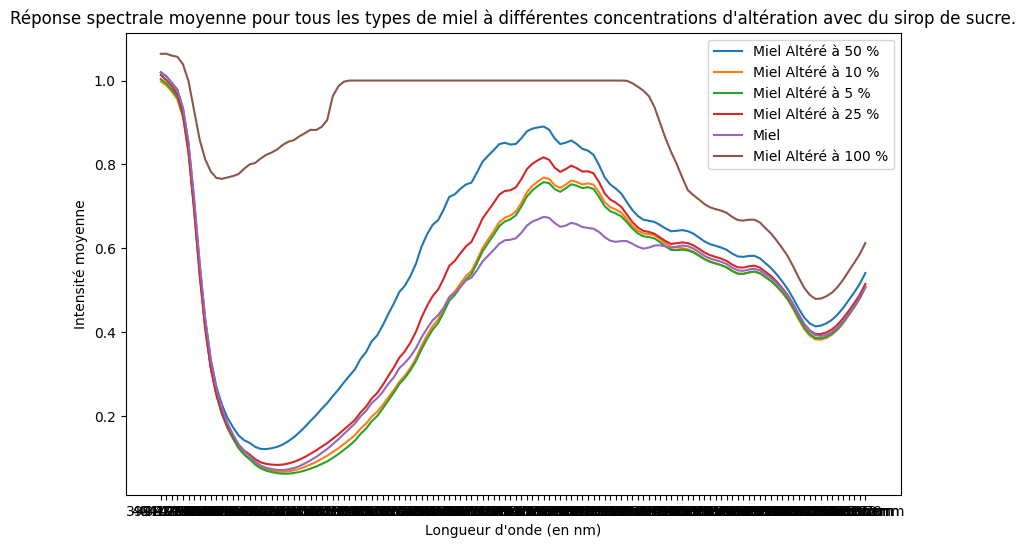

In [132]:
def Plot_mean_spectral_response():
    concentrations = df['Concentration_Class'].unique()

    plt.figure(figsize=(10, 6))  # Ajuster la taille de la figure

    for concentration in concentrations:
        df_concentration = df[df['Concentration_Class'] == concentration]
        wavelengths = df_concentration.columns[4:-1] # Sélectionner les colonnes de 399.40nm à 1063.79nm
        intensity_means = df_concentration.iloc[:, 4:-1].mean(axis=0) # Calculer les moyennes des intensités pour chaque colonne

        label = 'Miel' if concentration == 0 else f'Miel Altéré à {concentration} %'
        plt.plot(wavelengths, intensity_means, label=label)
        plt.title('Réponse spectrale moyenne pour tous les types de miel à différentes concentrations d\'altération avec du sirop de sucre.')
        plt.xlabel('Longueur d\'onde (en nm)')
        plt.ylabel('Intensité moyenne')
        plt.legend()
plt.show()
Plot_mean_spectral_response()


*Créer une nouvelle colonne appelée 'Adulteration' dans la DataFrame.*

*   Attribuer la valeur 0 si la valeur de la colonne'Concentration_Class' est égale à 0
*   Sinon la valeur 1.

*Puis, afficher les valeurs de la nouvelle colonne.*


---



In [ ]:
df['Adulteration'] = (df['Concentration_Class']).apply(lambda x: 0 if x==0 else 1)
print(df['Adulteration'])

0       1
1       1
2       1
3       1
4       1
       ..
8670    1
8671    1
8672    1
8673    1
8674    1
Name: Adulteration, Length: 8675, dtype: int64


**Modélisation :**

# **Apprentissage supervisé :**
1- Clasification Binaire

***KNN***

*Créer deux nouvelles variables x et y:*


*   x : Feature **=>** Contient les valeurs de longeur d'onde
*   y : Target **=>** Contient la colonne d'Adulteration


---




#  Feature Selection

---
**Méthode 1** : **SelectKBest** ▶ the class can be used to select a specific number of features in a suite of different statistical tests.
in this case we are using chi-squared (chi2) statistical test



In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [ ]:
y = df['Adulteration']
x = df.iloc[:, 4:-2] # les longueurs d'onde spectrales de la caméra hyperspectrale.Ces longueurs d'onde vont de 400 nm à 1064 nm.

- Apply SelectKBest class to extract top best features

In [ ]:
#df.iloc[:, 4:-2].columns length=128

bestfeatures = SelectKBest(score_func=chi2 , k=128)
fit = bestfeatures.fit(x,y)

In [ ]:
#fit.scores_  => array that contains a specific score for each feature

In [ ]:
dfscores = pd.DataFrame(fit.scores_) #Scores
dfcolumns = pd.DataFrame(x.columns) #specs

#concat two dataframes for better visuqlization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns

In [ ]:
featureScores

,Specs,Score
0,399.40nm,0.081408
1,404.39nm,0.098129
2,409.38nm,0.075981
3,414.37nm,0.067785
4,419.37nm,0.129219
...,...,...
123,1041.92nm,0.218521
124,1047.38nm,0.242363
125,1052.85nm,0.259987
126,1058.32nm,0.287648


In [ ]:
#to print best features :
print(featureScores.nlargest(128,'Score')) #this function sorts the score values and prints the first 128 rows

         Specs      Score
69    752.63nm  21.983456
77    794.77nm  21.956680
68    747.38nm  21.930573
74    778.94nm  21.864328
73    773.67nm  21.594150
..         ...        ...
113   987.49nm   0.003730
116  1003.78nm   0.001364
114   992.92nm   0.000365
115   998.35nm   0.000041
10    449.45nm   0.000001

[128 rows x 2 columns]




---



**Méthode 2** : RandomForestClassifier : supervised learning algorithm Enabling the performance of both classification and regression tasks at the same time.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()
model.fit(x,y)

RandomForestClassifier()

In [ ]:
print(model.feature_importances_)

[0.00043541 0.00039552 0.00029127 0.00036549 0.00020733 0.00033295
 0.0017685  0.00794785 0.00843512 0.00745803 0.00772574 0.00703578
 0.00529718 0.00330031 0.00847591 0.00519431 0.00390201 0.00413275
 0.00821031 0.006955   0.00718518 0.01231233 0.01258876 0.01151935
 0.01202516 0.01309175 0.01481346 0.01399158 0.02043868 0.01331133
 0.01427569 0.00997613 0.01410111 0.01383032 0.01660536 0.01895736
 0.01455528 0.01420916 0.02205776 0.01128024 0.01108494 0.01164115
 0.01339321 0.01638434 0.01911756 0.01457088 0.01469815 0.01286874
 0.01050318 0.00675675 0.00403497 0.0050642  0.00293825 0.00373606
 0.00639815 0.0051707  0.00496294 0.00441913 0.0049375  0.01426982
 0.00785296 0.00648876 0.0110115  0.01119762 0.01253247 0.0059268
 0.00514766 0.0036731  0.00476497 0.0045401  0.00594221 0.00407142
 0.00767829 0.00439776 0.0065485  0.00785987 0.00930792 0.00694293
 0.00811598 0.00941029 0.00669838 0.00890019 0.00919469 0.00868777
 0.00688088 0.00975166 0.01466903 0.01349618 0.01229708 0.00938

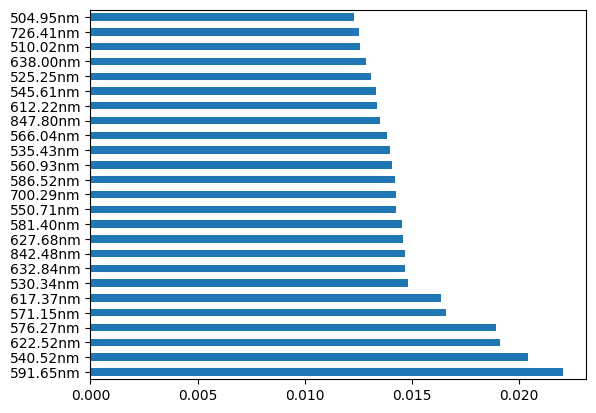

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

**Méthode 3**: Matrice de corrélation
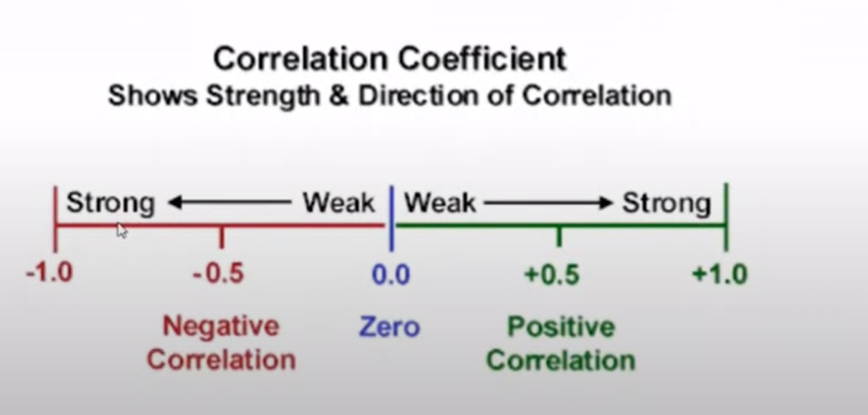




In [ ]:
import seaborn as sns
df.corr() # coeff de corrélation entre deux attributs


<ipython-input-104-f6a45e8b425f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() # coeff de corrélation entre deux attributs


,Acquisition,Concentration_Class,Concentration,399.40nm,404.39nm,409.38nm,414.37nm,419.37nm,424.38nm,429.38nm,...,1025.55nm,1031.00nm,1036.46nm,1041.92nm,1047.38nm,1052.85nm,1058.32nm,1063.79nm,Adulteration,Cluster
Acquisition,1.000000,-0.005841,0.003298,-0.059087,-0.057620,-0.060442,-0.046593,-0.069070,-0.038514,-0.017703,...,-0.028640,-0.011033,0.004007,0.018780,0.029679,0.042914,0.050121,0.057630,-0.001568,0.039970
Concentration_Class,-0.005841,1.000000,0.993031,0.223422,0.242683,0.269246,0.333637,0.342853,0.340869,0.333415,...,0.426726,0.433653,0.441760,0.445930,0.446211,0.444784,0.440426,0.431020,0.377885,0.406288
Concentration,0.003298,0.993031,1.000000,0.214124,0.235597,0.261948,0.325728,0.334924,0.335034,0.329038,...,0.417522,0.424813,0.433255,0.437755,0.438351,0.437425,0.433442,0.424499,0.381657,0.405191
399.40nm,-0.059087,0.223422,0.214124,1.000000,0.683529,0.667967,0.578737,0.479139,0.305315,0.117280,...,0.242160,0.221645,0.199870,0.176150,0.144660,0.115773,0.084018,0.042541,-0.085739,0.250856
404.39nm,-0.057620,0.242683,0.235597,0.683529,1.000000,0.693163,0.607781,0.511172,0.364549,0.188028,...,0.289855,0.269240,0.248512,0.224221,0.194647,0.166693,0.134275,0.093470,-0.093848,0.253743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052.85nm,0.042914,0.444784,0.437425,0.115773,0.166693,0.183382,0.285327,0.372167,0.420320,0.442218,...,0.968145,0.977433,0.985286,0.991102,0.994980,1.000000,0.994613,0.988149,0.093936,0.257047
1058.32nm,0.050121,0.440426,0.433442,0.084018,0.134275,0.153366,0.263551,0.356795,0.413064,0.446704,...,0.956366,0.967413,0.976947,0.984746,0.991062,0.994613,1.000000,0.992216,0.100755,0.264209
1063.79nm,0.057630,0.431020,0.424499,0.042541,0.093470,0.117285,0.234821,0.341528,0.412318,0.459903,...,0.933583,0.947295,0.959816,0.970724,0.980979,0.988149,0.992216,1.000000,0.105258,0.282802
Adulteration,-0.001568,0.377885,0.381657,-0.085739,-0.093848,-0.084589,-0.085374,-0.108554,-0.104526,-0.100404,...,0.060614,0.070370,0.077791,0.083818,0.089374,0.093936,0.100755,0.105258,1.000000,0.055641


<ipython-input-102-24fac6158262>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='magma', fmt='.2f')


<Axes: >

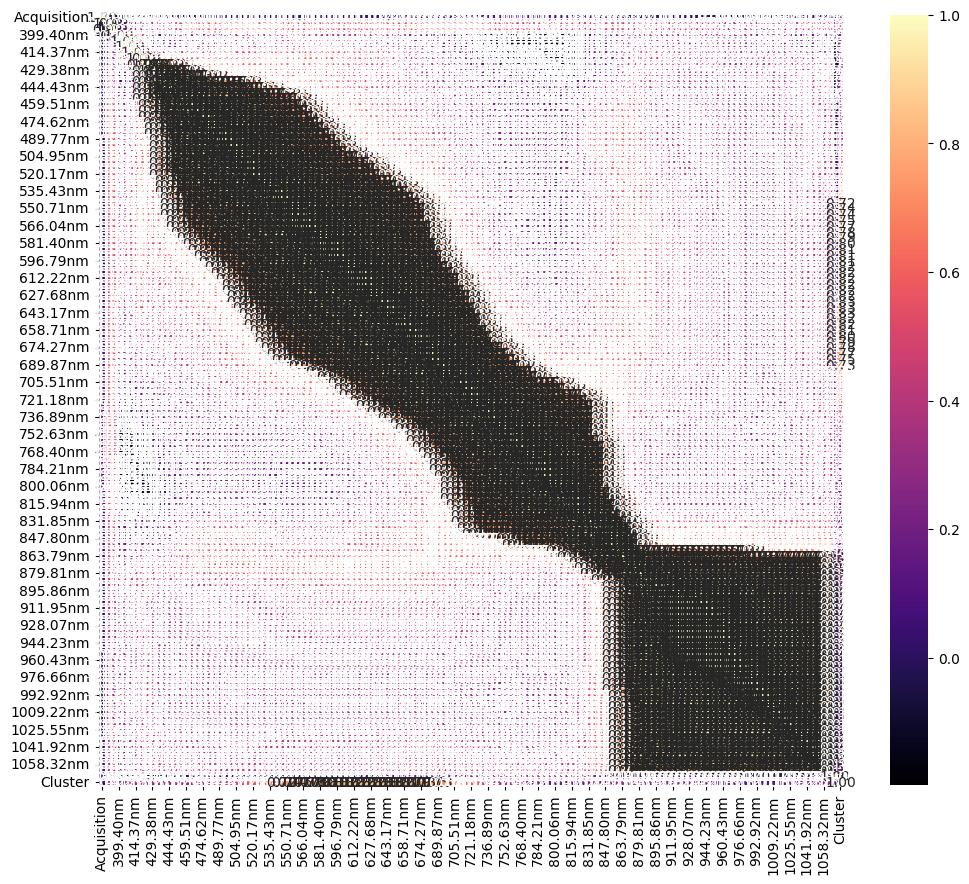

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='magma', fmt='.2f')



---



---



*Convertir le type de la variable y de Object à Int*

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

*L'évolution du score de classification en fonction des modifications du nombre de voisins dans le modèle permet d'analyser comment les changements de ce paramètre affectent les performances du modèle k-NN*

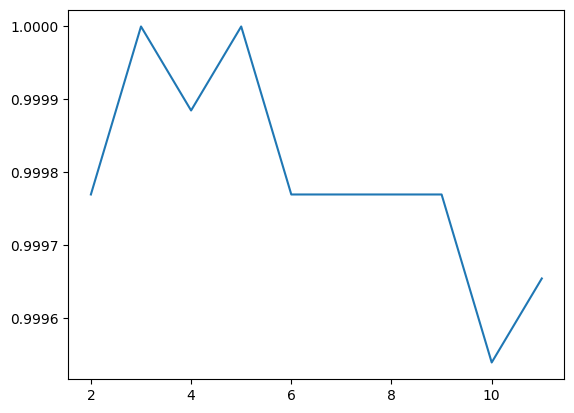

In [ ]:
l1=list()
l2=list()
for k in range(2,12):
    knn=KNeighborsClassifier(k)
    knn.fit(x,y)
    l1.append(k)
    l2.append(knn.score(x,y))
plt.plot(l1,l2)

**=>** Le graphe résultant permet d'identifier la valeur optimale de k (k=3 ou k=5) qui donne la meilleure performance du modèle sur les données d'entraînement.

*Créer un test set et un train set:*

---



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

*Choix du modèle : un classificateur k-NN (k plus proches voisins) avec une valeur de **k égale à 5** .*

---



In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)



*   *Entraîner un modèle k-NN sur l'ensemble d'entraînement (X_train,y_train)*
*   *Effectuer des prédictions sur l'ensemble de test (X_test)*


---





In [ ]:
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

*Afficher la précision du modèle sur l'ensemble de test:*


---



In [ ]:
print(knn_classifier.score(X_test,y_test))

0.9995389580451821


***Evaluation :***

Accuracy: 0.9995389580451821
Precision: 1.0
Recall: 0.9994739610731194
F1: 0.9997369113391212


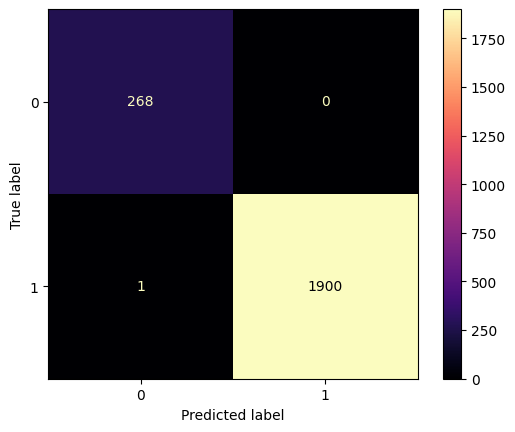

In [ ]:

print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='magma'))
#  Calculer et afficher plusieurs mesures de performance
print('Accuracy:', m.accuracy_score(y_test, y_pred))
print('Precision:', m.precision_score(y_test, y_pred))
print('Recall:', m.recall_score(y_test,y_pred))
print('F1:', m.f1_score(y_test, y_pred))

**=>** La matrice de confusion est un outil visuel qui permet d'évaluer la performance d'un modèle de classification en comparant ses prédictions avec les classes réelles.

*Générer un rapport détaillé sur les performances d'un modèle de classification*

---



In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       268
           1       1.00      1.00      1.00      1901

    accuracy                           1.00      2169
   macro avg       1.00      1.00      1.00      2169
weighted avg       1.00      1.00      1.00      2169



*Un classificateur k-NN (k plus proches voisins) avec une valeur de **k égale à 3** .*

1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       268
           1       1.00      1.00      1.00      1901

    accuracy                           1.00      2169
   macro avg       1.00      1.00      1.00      2169
weighted avg       1.00      1.00      1.00      2169



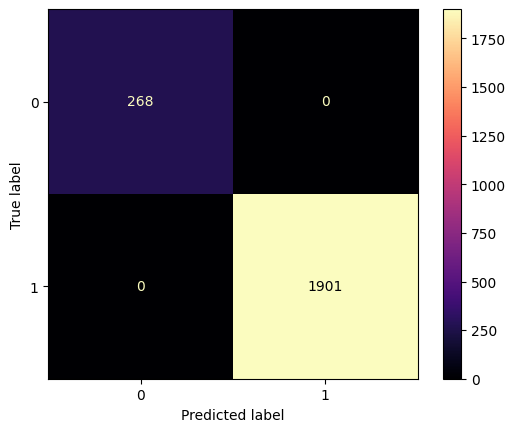

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
print(knn_classifier.score(X_test,y_test))
print(m.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='magma'))
#  Calculer et afficher plusieurs mesures de performance
print('Accuracy:', m.accuracy_score(y_test, y_pred))
print('Precision:', m.precision_score(y_test, y_pred))
print('Recall:', m.recall_score(y_test,y_pred))
print('F1:', m.f1_score(y_test, y_pred))
report = classification_report(y_test, y_pred)
print(report)

# **2- Multi-classes**

# Les importations des biliothéques nécessaires :

In [ ]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

In [ ]:
X = df.values[:,4:-2]
y = df['Concentration_Class'].values #array of Concentration_class values
print(y.dtype)

int64


Text(0, 0.5, 'Score')

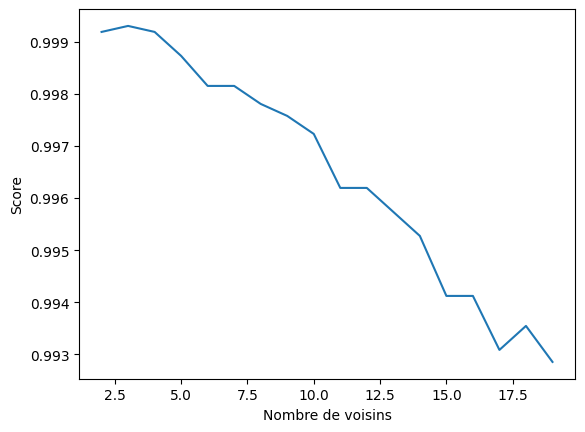

In [ ]:
#La variation du score de classification en fonction de la variation du nombre de voisins :
L1 = []
L2 = []

for k in range(2, 20):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X, y)
  s = knn.score(X, y)
  L1.append(k)
  L2.append(s)

plt.plot(L1, L2)
plt.xlabel("Nombre de voisins")
plt.ylabel("Score")


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

print("Accuracy :", cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())
print("Precision :", cross_val_score(knn, X, y, cv=10, scoring='precision_macro').mean())
print("Recall :", cross_val_score(knn, X, y, cv=10, scoring='recall_macro').mean())
print("F1 :", cross_val_score(knn, X, y, cv=10, scoring='f1_macro').mean())

Accuracy : 0.9213817975007839
Precision : 0.9393507884071619
Recall : 0.9348552393921563
F1 : 0.93530444073835


Instanciation du modèle KNN et entraînement :

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

**2-1 Entrainement**

In [ ]:
ypred = knn.predict(Xtest)

In [ ]:
print('\nClassification Report:\n', m.classification_report(ytest, ypred))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       270
           5       1.00      0.99      1.00       487
          10       1.00      1.00      1.00       442
          25       1.00      1.00      1.00       425
          50       1.00      1.00      1.00       500
         100       1.00      1.00      1.00        45

    accuracy                           1.00      2169
   macro avg       1.00      1.00      1.00      2169
weighted avg       1.00      1.00      1.00      2169



Matrice de confusion :

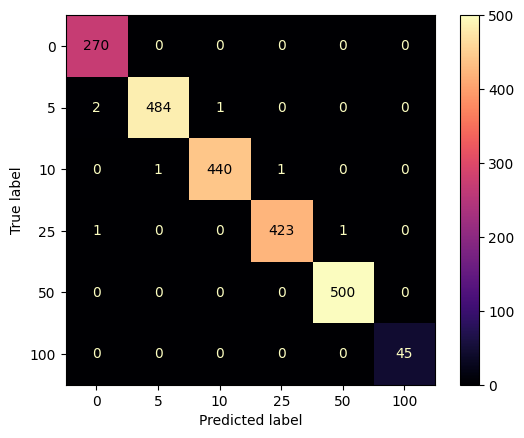

In [ ]:
print(m.ConfusionMatrixDisplay.from_predictions(ytest, ypred, cmap='magma'))

________________________________________________________________________________________
________________________________________________________________________________________


# **Apprentissage non supervisé : K-means**



In [ ]:
from sklearn.cluster import KMeans

In [ ]:
print(df.columns.to_list())

['Brand', 'Acquisition', 'Concentration_Class', 'Concentration', '399.40nm', '404.39nm', '409.38nm', '414.37nm', '419.37nm', '424.38nm', '429.38nm', '434.40nm', '439.41nm', '444.43nm', '449.45nm', '454.48nm', '459.51nm', '464.54nm', '469.58nm', '474.62nm', '479.67nm', '484.72nm', '489.77nm', '494.83nm', '499.89nm', '504.95nm', '510.02nm', '515.10nm', '520.17nm', '525.25nm', '530.34nm', '535.43nm', '540.52nm', '545.61nm', '550.71nm', '555.82nm', '560.93nm', '566.04nm', '571.15nm', '576.27nm', '581.40nm', '586.52nm', '591.65nm', '596.79nm', '601.93nm', '607.07nm', '612.22nm', '617.37nm', '622.52nm', '627.68nm', '632.84nm', '638.00nm', '643.17nm', '648.35nm', '653.53nm', '658.71nm', '663.89nm', '669.08nm', '674.27nm', '679.47nm', '684.67nm', '689.87nm', '695.08nm', '700.29nm', '705.51nm', '710.73nm', '715.95nm', '721.18nm', '726.41nm', '731.65nm', '736.89nm', '742.13nm', '747.38nm', '752.63nm', '757.88nm', '763.14nm', '768.40nm', '773.67nm', '778.94nm', '784.21nm', '789.49nm', '794.77nm',

In [ ]:
# Nombre de clusters
n_clusters = 2
# Sélectionner les attributs pour l'apprentissage non supervisé
X = df.iloc[:, 4:-2]
kmeans = KMeans(n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
kmeans.fit(X)
#print(kmeans.cluster_centers_)
print(kmeans.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 ... 1 1 1]


In [120]:
df['Cluster'].value_counts()

0    5573
1    3102
Name: Cluster, dtype: int64

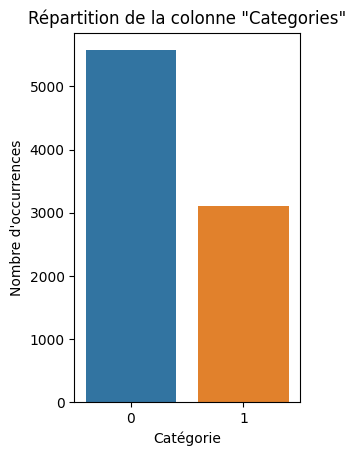

In [122]:

# Créer un countplot pour 'Adulteration'
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Cluster')
plt.xlabel('Catégorie')
plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition de la colonne "Categories"')

plt.show()


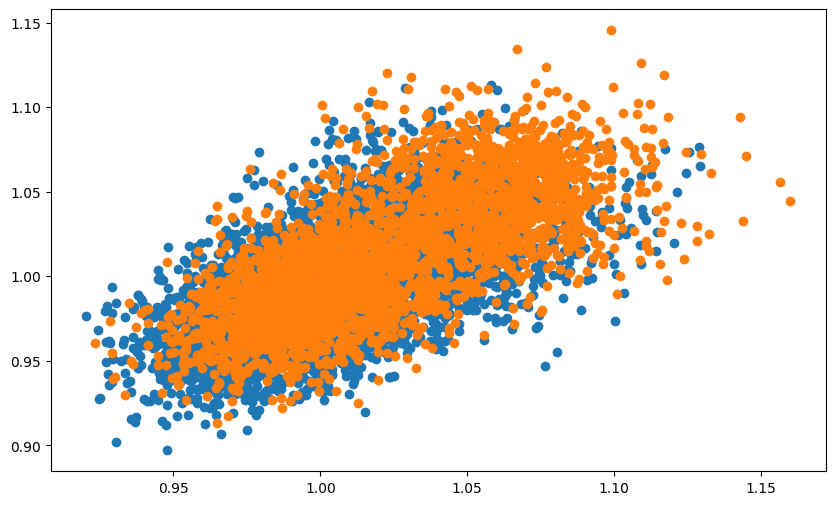

In [ ]:
# Visualisation des résultats
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    cluster_data = X[df['Cluster'] == cluster]
    plt.scatter(cluster_data.iloc[:, 0], cluster_data.iloc[:, 1], label=f'Cluster {cluster}')


In [ ]:
# Sélectionner les données adulterated_data où la colonne 'Adulteration' est égale à 1
adulterated_data = df[df['Adulteration'] == 1]
print(adulterated_data)

     Brand  Acquisition  Concentration_Class  Concentration  399.40nm  \
0       C1            2                   50           50.0  1.029176   
1       C1            2                   50           50.0  1.053778   
2       C1            2                   50           50.0  1.088773   
3       C1            2                   50           50.0  1.040980   
4       C1            2                   50           50.0  1.114777   
...    ...          ...                  ...            ...       ...   
8670    C7            5                   10           10.0  0.998314   
8671    C7            5                   10           10.0  1.019400   
8672    C7            5                   10           10.0  0.996347   
8673    C7            5                   10           10.0  0.995900   
8674    C7            5                   10           10.0  0.986418   

      404.39nm  409.38nm  414.37nm  419.37nm  424.38nm  ...  1031.00nm  \
0     1.056051  1.038291  1.034530  0.999627  0.9

In [ ]:
# Sélection des données adulterées et impression :
print(kmeans.labels_[8500])

0


**=>** L'observation à l'index 8500 a été assignée au cluster avec l'étiquette 0. Cela signifie que, selon les caractéristiques ou les attributs de cette observation, K-Means l'a regroupée avec d'autres échantillons similaires dans le cluster 0.

# Preparé par:

**Ben Tamrout Chadha**

**IF5**

**Sujet 1**

